## Import the libraries

In [7]:
import matplotlib.pyplot as plt
from Filters import Filters
import json
from pennylane import numpy as np
from tensorflow import keras
import tensorflow as tf


## Setting of the main hyper-parameters of the model

In [8]:
n_epochs = 30   # Number of optimization epochs
n_layers = 1    # Number of random layers
n_train = 50    # Size of the train dataset
n_test = 30     # Size of the test dataset
n_channels = 4 # Number of channels

SAVE_PATH = "../results/"  # Data saving folder
PREPROCESS = True           # If False, skip quantum processing and load data from SAVE_PATH



## Loading of the MNIST dataset

In [9]:
mnist_dataset = keras.datasets.mnist
(train_images, train_labels), (test_images, test_labels) = mnist_dataset.load_data()

# Reduce dataset size
train_images = train_images[:n_train]
train_labels = train_labels[:n_train]
test_images = test_images[:n_test]
test_labels = test_labels[:n_test]

# Normalize pixel values within 0 and 1
train_images = train_images / 255
test_images = test_images / 255

# Add extra dimension for convolution channels
train_images = np.array(train_images[..., tf.newaxis], requires_grad=False)
test_images = np.array(test_images[..., tf.newaxis], requires_grad=False)

## Pre-processing of the dataset, applying the filter

Here we are investigating if the quantum filter add any advantace when compared to a quantum inspired filter

## Loaded filtered images 

In [10]:

filtered_train_images = np.load(SAVE_PATH + "filtered_train_images.npy")
filtered_test_images = np.load(SAVE_PATH + "filtered_test_images.npy")
q_train_images = np.load(SAVE_PATH + "q_train_images.npy")
q_test_images = np.load(SAVE_PATH + "q_test_images.npy")

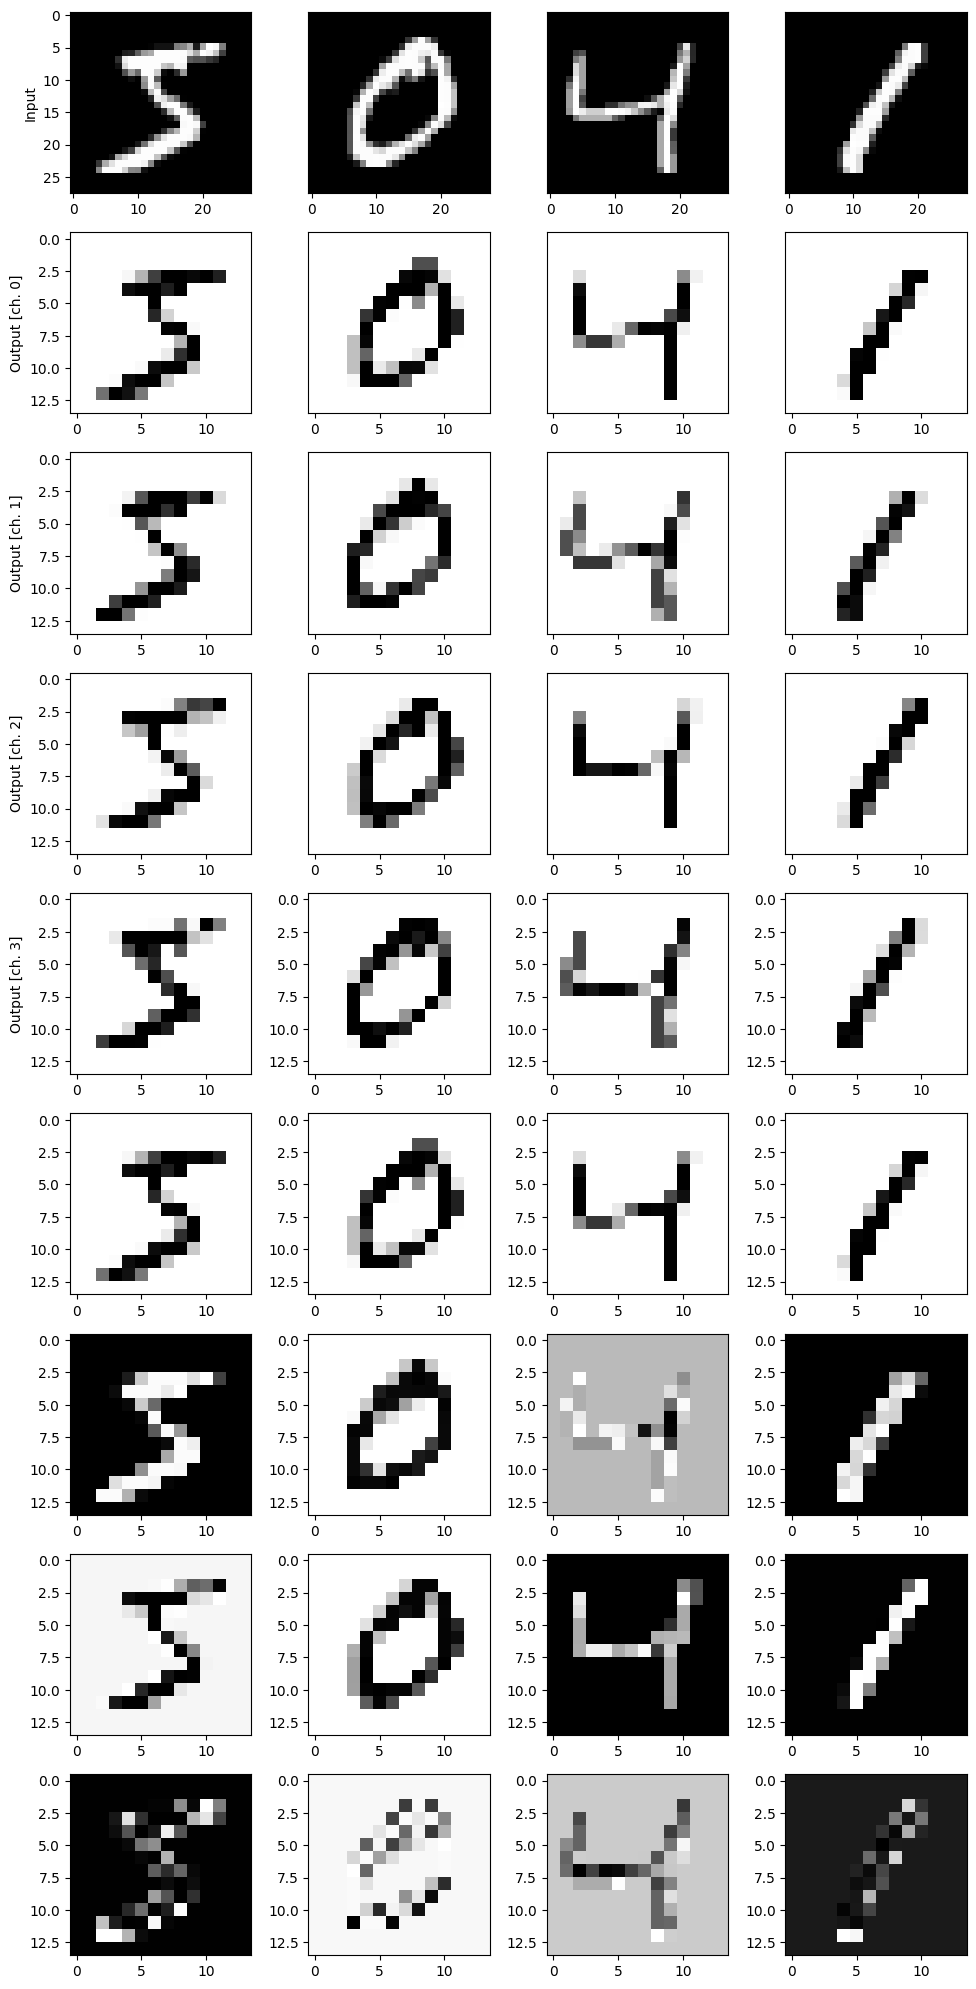

In [11]:
n_samples = 4

fig, axes = plt.subplots(1 + n_channels+4, n_samples, figsize=(10, 20))
for k in range(n_samples):
    axes[0, 0].set_ylabel("Input")
    if k != 0:
        axes[0, k].yaxis.set_visible(False)
    axes[0, k].imshow(train_images[k, :, :, 0], cmap="gray")


    # Plot all output channels
    for c in range(n_channels):
        axes[c + 1, 0].set_ylabel("Output [ch. {}]".format(c))
        if k != 0:
            axes[c, k].yaxis.set_visible(False)
        axes[c + 1, k].imshow(filtered_train_images[k, :, :, c], cmap="gray")
        axes[c + 5, k].imshow(q_train_images[k, :, :, c], cmap="gray")


plt.tight_layout()
plt.show()

## Load results 

In [14]:
#load the results from Json file
with open(SAVE_PATH +'q_history.json','r') as json_file:
    results_quantum = json.load(json_file)
with open(SAVE_PATH +'classical_filtered_history.json','r') as json_file:
    results_filtered_classic = json.load(json_file)
with open(SAVE_PATH +'classical_history.json','r') as json_file:
    results_classic = json.load(json_file)

## Visualisation

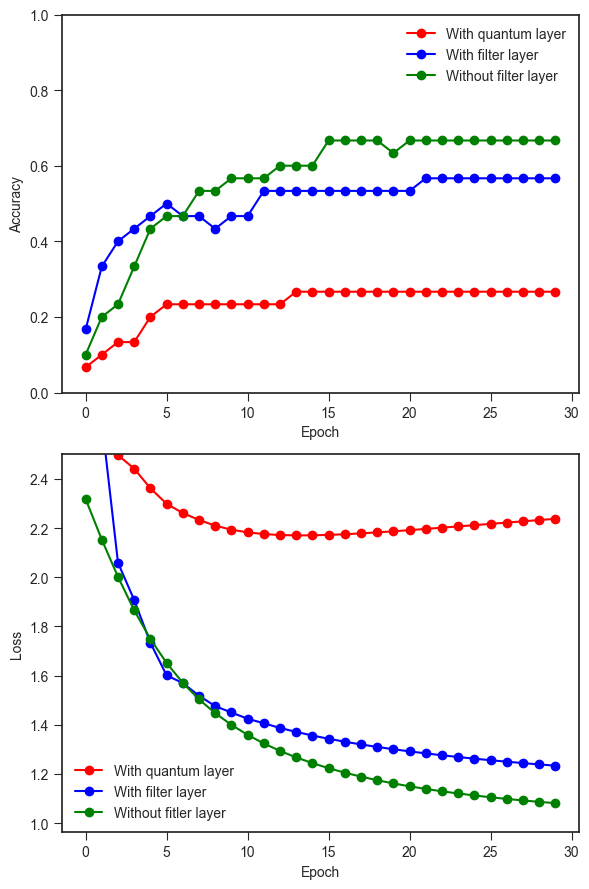

In [15]:
%matplotlib inline
plt.style.use("seaborn-v0_8-ticks")
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(6, 9))

ax1.plot(results_quantum["val_accuracy"], "-or", label="With quantum layer")
ax1.plot(results_filtered_classic["val_accuracy"], "-ob", label="With filter layer")
ax1.plot(results_classic["val_accuracy"], "-og", label="Without filter layer")
ax1.set_ylabel("Accuracy")
ax1.set_ylim([0, 1])
ax1.set_xlabel("Epoch")
ax1.legend()

ax2.plot(results_quantum["val_loss"], "-or", label="With quantum layer")
ax2.plot(results_filtered_classic["val_loss"], "-ob", label="With filter layer")
ax2.plot(results_classic["val_loss"], "-og", label="Without fitler layer")
ax2.set_ylabel("Loss")
ax2.set_ylim(top=2.5)
ax2.set_xlabel("Epoch")
ax2.legend()
plt.tight_layout()
plt.show()

In [15]:
np.shape(filtered_train_images)

(50, 14, 14, 4)

In [16]:
np.shape(train_images)

(50, 28, 28, 1)

In [17]:
np.shape(q_train_images)

(50, 14, 14, 4)